## Dataset exploration

In [1]:
!pip install scikeras
!pip install tensorflow scikit-learn

!pip install -U scikit-learn==1.5.1 scikeras==0.13.0

import pandas as pd
import matplotlib.pyplot as plt
from numpy import*
from sklearn import*


# sklearn 10FCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


# Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 135.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.1 which is incompatible.


In [ ]:
!unzip /content/drive/MyDrive/Dublin_study/DL/covid.zip

In [3]:
from PIL import Image
import glob

Mask folder that is present in each class folder will not be used as it is for segmentation tasks and we are only doing classification

**Class	Description**
COVID-19:	X-ray with COVID-19.
Normal: no infection.


Lung Opacity	Non-COVID infections showing opacities in lungs (e.g. “lung infection” / non-COVID pneumonia)

Viral Pneumonia	Pneumonia caused by viruses (non-COVID viruses)

In [4]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/COVID/images/*.png')
print("Total images with covid label:", len(image_count))

Total images with covid label: 3616


In [5]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/COVID/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 3616})


In [6]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/*.png')
print("Total images with Lung opacity (non-covid) label:", len(image_count))

Total images with Lung opacity (non-covid) label: 6012


In [7]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 6012})


In [8]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/Normal/images/*.png')
print("Total images with Normal (no-infection) label:", len(image_count))

Total images with Normal (no-infection) label: 10192


In [9]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/Normal/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 10192})


In [10]:
import glob

image_count = glob.glob('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/*.png')
print("Total images with Normal (no-infection) label:", len(image_count))

Total images with Normal (no-infection) label: 1345


In [11]:
import os
from collections import Counter
# confirming all files in folder are .png no other image file type
folder = "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"

extensions = [os.path.splitext(f)[1].lower() for f in os.listdir(folder)]
counts = Counter(extensions)

print(counts)


Counter({'.png': 1345})


**clear class imbalance, will address later using techniques from other papers with small dummy model code**

### Image shape and resizing

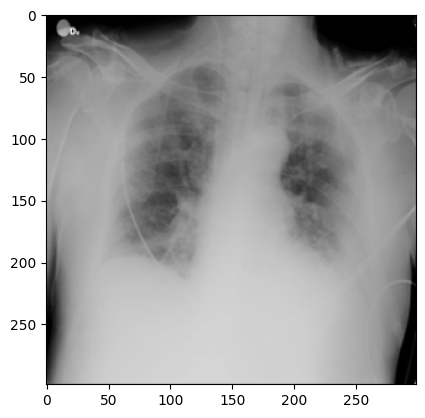

In [12]:
import os
import glob
from PIL import Image

myImage =  Image.open("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png")


plt.imshow(myImage,cmap = 'gray')
plt.show()

In [13]:
print(myImage.size)

(299, 299)


All images are 399x399 pixels

Source for resizing width and height: https://www.nature.com/articles/s41598-024-61693-0?

"Resizing the images is an essential process to satisfy the requirement of CNN of equally sized input images. In this research, the process of resizing X-ray images has been done to fit all X-ray images to the input size of the used pre-trained CNN models which are VGG19 and EfficientNetB0. Therefore, all images’ versions either full or segmented versions were resized to fit the CNNs input image size which is 224 × 224 pixels. To expedite the training process, it was found that the size of 112 × 112 pixels expedited the training without affecting the performance metrics."

We do not need to use 224x224 as this is the standard and only required for using pretrained models which we are not using. Since the achieved similar results with 112x112 pixels we will therefore use it.

In [14]:
w = 112
h = 112


X = []
Y=[]

for item in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/COVID/images',item)
    im = Image.open(img_path)
    img = im.resize((w,h), Image.Resampling.LANCZOS)# the resampling part does antialiasing but package name changed
    img=img.convert('L')
    X.append(img)
    Y.append(0)

newImages_1 = []

for item in os.listdir("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images', item)
    im = Image.open(img_path)
    img = im.resize((w,h),Image.Resampling.LANCZOS)
    img=img.convert('L')
    X.append(img)
    Y.append(1)

for item in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/Normal/images', item)
    im = Image.open(img_path)
    img = im.resize((w,h),Image.Resampling.LANCZOS)
    img=img.convert('L')
    X.append(img)
    Y.append(2)

for item in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
    img_path = os.path.join('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images', item)
    im = Image.open(img_path)
    img = im.resize((w,h),Image.Resampling.LANCZOS)
    img=img.convert('L')
    X.append(img)
    Y.append(3)

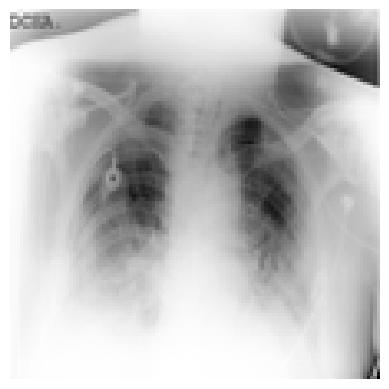

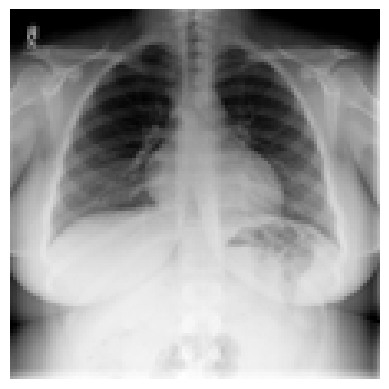

In [15]:
import matplotlib.pyplot as plt


plt.imshow(X[0], cmap="gray")

plt.axis("off")
plt.show()

plt.imshow(X[11000], cmap="gray")
plt.axis("off")
plt.show()


In [16]:
print(len(X))

21165


In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from PIL import Image
import glob

In [18]:
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], w, h, 1).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

batch processing and data generator


In [19]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
%matplotlib inline
import time

from PIL import Image
import glob
from sklearn.model_selection import train_test_split


**Steps taken to reduce class imbalance**

1- Implementing class weighting

2- stratified sampling

3- data augmentation only on training not validation

papers:

1- https://pmc.ncbi.nlm.nih.gov/articles/PMC9422401/ they applied a class-weighted categorical cross-entropy loss and also data augmentation on only training . Class weights was best perfroming

2- https://www.nature.com/articles/s41598-023-45532-2 similar yet slightly different data augmentation

3- https://pubmed.ncbi.nlm.nih.gov/34305440/ did data augmentation as part of training pipeline so training only

4- https://pmc.ncbi.nlm.nih.gov/articles/PMC8907145/? did data augmentation

5- https://www.mdpi.com/1424-8220/23/4/2333 for stratified sampling



Ethical reason to not do oversampling in medical field:
https://pmc.ncbi.nlm.nih.gov/articles/PMC10789107/

Paper argues that When synthetic images are generated, there is a risk that they contain visual patterns that do not correspond to real medical pathology. A model might learn these artifacts instead of actual COVID-19 or pneumonia features which could lead it to perfrom "well" but fail on real patients.A radiologist must inspect samples and validate that they are medically sound to use as training

In [21]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split
# fix random seed
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)



# stratified sampling done
Y_int = np.argmax(Y, axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, stratify=Y_int, random_state=1
)


# compute class weights
y_train_int = np.argmax(Y_train, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)
class_weights = {i: w for i, w in enumerate(class_weights)}

print("Class weights:", class_weights)

# Augmentation for TRAINING ONLY
train_datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 2. NO AUGMENTATION for validation
val_datagen = ImageDataGenerator()

train_datagen.fit(X_train)

train_batches = train_datagen.flow(X_train, Y_train, batch_size=32)
val_batches   = val_datagen.flow(X_val, Y_val, batch_size=32)


Class weights: {0: np.float64(1.4631870031109575), 1: np.float64(0.8802245789145352), 2: np.float64(0.5191317144959529), 3: np.float64(3.934014869888476)}


**Please note the class_weight hyperparameter in the model**

In [ ]:
# dummy model
modelC = Sequential([
    Conv2D(32, (3, 3), strides=1, padding="valid",
           input_shape=(w, h, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding="valid"),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit with CLASS WEIGHTS
history = modelC.fit(
    train_batches,
    validation_data=val_batches,
    epochs=20,
    verbose=1,
    class_weight=class_weights # IMPORTANT
)

# accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()